---
<a name='title'></a>
# **<font color="#8397df"> Modelación Climática Tropical </font>**
### **<font color="#8cdce6"> Precipitación Climatológica en MSWEP </font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [7]:
def mapa_MC(data,levels,ccmap,titulo,extend='both',cbarlabel='pr  [mm día$^{-1}$]',limite_NS=75):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

filename='/home/jovyan/ModClim/MSWEP_monthly_SPEAR_grid_1980-2020.nc'
ds=xr.open_dataset(filename)
pr=ds['PRECT']
#pr.to_netcdf('MSWEP_Global.nc')
pr

In [8]:
# Archivo de precipitación MSWEP
filename='/home/jovyan/ModClim/datos_actualizados/MSWEP_monthly_1980-2023.nc'
ds=xr.open_dataset(filename)
pr=ds['precipitation']
#pr.to_netcdf('MSWEP_Global.nc')
pr

<xarray.DataArray 'precipitation' (time: 528, lat: 180, lon: 576)> Size: 219MB
[54743040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7

In [9]:
pr=pr*8
pr['units']='mm day-1'

In [10]:
pr.time

<xarray.DataArray 'time' (time: 528)> Size: 4kB
array(['1980-01-16T09:00:00.000000000', '1980-02-15T09:00:00.000000000',
       '1980-03-16T09:00:00.000000000', ..., '2023-10-16T09:00:00.000000000',
       '2023-11-15T21:00:00.000000000', '2023-12-16T09:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
    units    <U8 32B 'mm day-1'

In [11]:
# Cargamos los datos guardados
#global_data = xr.open_dataset('MSWEP_Global.nc')
#gpcc_global = global_data.to_array()[0] 

In [12]:
pr_years = pr.sel(time=slice('1980', '2023'))

In [13]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
jjas

<xarray.DataArray 'precipitation' (time: 176, lat: 180, lon: 576)> Size: 73MB
array([[[3.6968997 , 4.1765714 , 4.605028  , ..., 3.5025904 ,
         3.4209785 , 3.397676  ],
        [3.9489748 , 4.449613  , 4.7988253 , ..., 3.537124  ,
         3.5966697 , 3.7570875 ],
        [3.9443133 , 4.009031  , 3.9166324 , ..., 3.5902703 ,
         3.7956212 , 3.9107604 ],
        ...,
        [2.0870543 , 2.1597166 , 1.6634128 , ..., 3.0382166 ,
         2.8960488 , 2.5011177 ],
        [1.9832969 , 1.9435625 , 1.9943974 , ..., 2.4642196 ,
         2.7560132 , 2.5804765 ],
        [2.7238367 , 2.990742  , 2.5590405 , ..., 2.4550345 ,
         2.8810399 , 2.8781438 ]],

       [[3.192906  , 3.1687064 , 3.1652873 , ..., 3.9289346 ,
         3.5831876 , 3.3547313 ],
        [3.4355335 , 3.3302884 , 3.172368  , ..., 3.8837717 ,
         3.5579538 , 3.4792366 ],
        [3.6409674 , 3.4805732 , 3.4811347 , ..., 3.7061436 ,
         3.6247895 , 3.7312582 ],
...
        [0.987276  , 1.0487883 , 0.9775554 , ..., 1.5442193 ,
         1.1813595 , 0.9180212 ],
        [1.087089  , 0.9416287 , 0.84272957, ..., 1.6082096 ,
         2.001552  , 1.3808626 ],
        [1.9777646 , 2.160751  , 1.5772915 , ..., 1.0730511 ,
         1.5206599 , 1.7081478 ]],

       [[5.391754  , 5.3864717 , 5.419157  , ..., 5.3955703 ,
         5.2325406 , 5.2524295 ],
        [5.77445   , 5.7443676 , 5.6824274 , ..., 5.505522  ,
         5.4308333 , 5.4797115 ],
        [6.146071  , 5.998458  , 5.6806936 , ..., 5.9612274 ,
         5.7692523 , 5.958668  ],
        ...,
        [3.0609827 , 1.8111529 , 1.1997212 , ..., 4.3345847 ,
         4.3415055 , 3.826932  ],
        [2.117723  , 1.754087  , 1.6488732 , ..., 3.3081925 ,
         3.8221161 , 2.8912458 ],
        [2.073937  , 2.156     , 1.9481077 , ..., 2.9972167 ,
         3.5782924 , 2.7317247 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1980-06-15T21:00:00 ... 2023-09-15T21:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [14]:
jjas.lat

<xarray.DataArray 'lat' (lat: 180)> Size: 1kB
array([-44.75, -44.25, -43.75, -43.25, -42.75, -42.25, -41.75, -41.25, -40.75,
       -40.25, -39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25,
       -35.75, -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25, -31.75,
       -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25, -27.75, -27.25,
       -26.75, -26.25, -25.75, -25.25, -24.75, -24.25, -23.75, -23.25, -22.75,
       -22.25, -21.75, -21.25, -20.75, -20.25, -19.75, -19.25, -18.75, -18.25,
       -17.75, -17.25, -16.75, -16.25, -15.75, -15.25, -14.75, -14.25, -13.75,
       -13.25, -12.75, -12.25, -11.75, -11.25, -10.75, -10.25,  -9.75,  -9.25,
        -8.75,  -8.25,  -7.75,  -7.25,  -6.75,  -6.25,  -5.75,  -5.25,  -4.75,
        -4.25,  -3.75,  -3.25,  -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,
         0.25,   0.75,   1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,
         4.75,   5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,  13.25,
        13.75,  14.25,  14.75,  15.25,  15.75,  16.25,  16.75,  17.25,  17.75,
        18.25,  18.75,  19.25,  19.75,  20.25,  20.75,  21.25,  21.75,  22.25,
        22.75,  23.25,  23.75,  24.25,  24.75,  25.25,  25.75,  26.25,  26.75,
        27.25,  27.75,  28.25,  28.75,  29.25,  29.75,  30.25,  30.75,  31.25,
        31.75,  32.25,  32.75,  33.25,  33.75,  34.25,  34.75,  35.25,  35.75,
        36.25,  36.75,  37.25,  37.75,  38.25,  38.75,  39.25,  39.75,  40.25,
        40.75,  41.25,  41.75,  42.25,  42.75,  43.25,  43.75,  44.25,  44.75])
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
    units    <U8 32B 'mm day-1'
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_N
    axis:           Y
    bounds:         lat_bnds

In [15]:
# Seleccionamos el área específica 
area = jjas.sel(lat=slice(0, 35))
arealon = jjas.sel(lon=slice(240.9375, 295.3125))

In [16]:
mean_precipitation_obs = arealon.groupby('time.year').mean(dim='time').mean(dim=['lat', 'lon']).values

In [17]:
mean_jjas = arealon.mean('time')

In [18]:
lats=mean_jjas.lat
lons=mean_jjas.lon

In [19]:
from cartopy.util import add_cyclic_point
data, lon = add_cyclic_point(mean_jjas, coord=lons)

In [20]:
print(lons.shape)
print(mean_jjas.shape)

(88,)
(180, 88)


In [21]:
# Guardamos los datos en un archivo netcdf
#mean_jjas.to_netcdf('MSWEP_ClimJJAS_actualizado.nc')

In [22]:
print(np.nanmin(mean_jjas), np.nanmax(mean_jjas))

0.017493552 38.12361


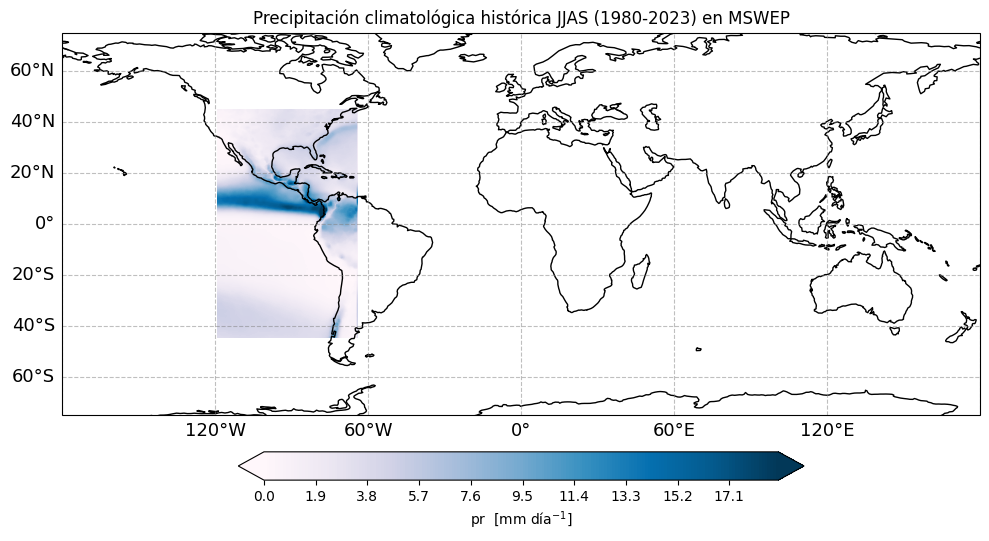

In [23]:
mapa_MC(mean_jjas,np.arange(0,19,0.1),'PuBu','Precipitación climatológica histórica JJAS (1980-2023) en MSWEP')

In [24]:
# seleccionamos el área específica 
area = mean_jjas.sel(lat=slice(9.25, 33.25))
arealon = area.sel(lon=slice(242, 275.75))

In [25]:
# La siguiente es la función modificada para poder insertar manualmente las coordenadas al llamarla para graficar
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

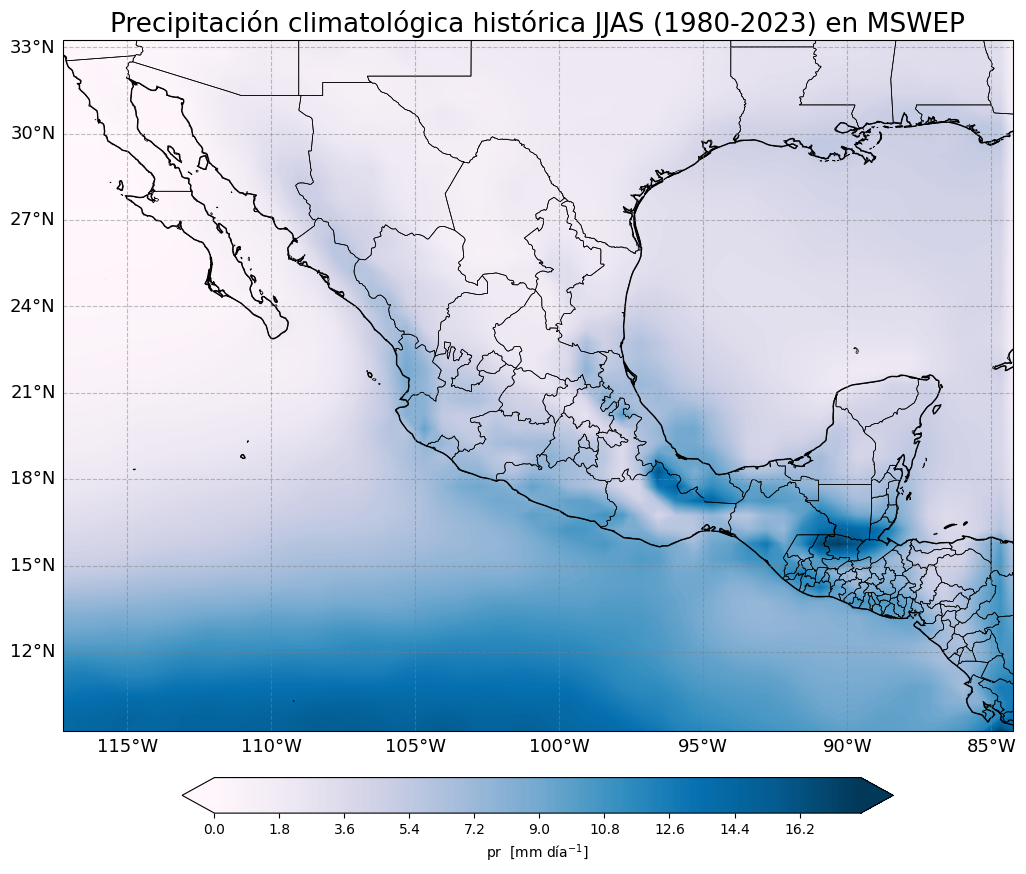

In [26]:
mapa_MC(arealon, np.arange(0,18,0.1), 'PuBu', 'Precipitación climatológica histórica JJAS (1980-2023) en MSWEP', 
        lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

In [27]:
# Imprimimos mínimos y máximos
print(np.nanmin(arealon), np.nanmax(arealon))

0.065935425 17.39439
